In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv("data/titanic_train.csv")
test_df=pd.read_csv("data/titanic_test.csv")
combine=[train_df,test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Looking above, Categorical variables are                                                                                     
Nominal: Survived, Sex, Embarked                                                                                                   
ordinal: Pclass

Numerical features                                                                                                              
Continuous:Age,Fare                                                                                                              
Discrete:SibSp,Parch                                                                                                             
Ticket is a mix data form of alphabet and numerical,and hence we call it alphnumeric

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Features Containing blank or Null values                                                                                         
Cabin,Age,Embarked

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the kaggle datapage it says that total no. of actual datasets contain 2,224,while we are given a sample of 891 data

75% of Parch data is 0.00,which means that most passengers didn't travel with parents or children.                              
38.33% were survived in this sample,while in actual population 32% survived.

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Markun, Mr. Johann",male,347082,G6,S
freq,1,577,7,4,644


"Cabin" has lot of missing datas,total count is only 204, out of those 147 are unique.Meaning,there are duplicate data or many people
share a same cabin.
same goes with "Ticket". 

# Assumptions taken

Since "Age" is likely to affect survival,this feature has to complete,like putting values in place of missing data,same goes with
"Embarked" features.                                                                                                          
"Ticket" feature should be dropped because it contains lot of duplicate datas,and it don't affect on survival.                  
"Cabin" column  has to dropped,as most datas are missing.                                                                       
"PassengerId" and "Name" should also dropped,as they are not gonna contribute in survival.

In [8]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


from here "Pclass" certainly influencing "survival". people havingPclass 1 have most chance of surviving.

In [9]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


female has most chance of survival.so,"Sex" is important feature.

In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


here,there isn't strong correlation 

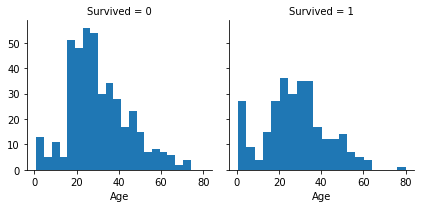

In [11]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Analysing above,infant 0-4 years are most likely to survive.                                                                    
oldest one has also survived.                                                                                                   
most passengers are in the range of 20-40.                                                                                      
Large no. of 15-35, didn't survived.                                                                                            
so Age is important feature.since,survival chances are depending on age group,I would like to group them in certain range.
And I have to complete this feature as well.



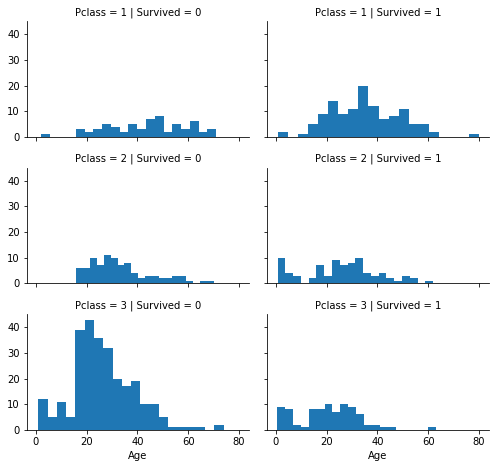

In [12]:
grid=sns.FacetGrid(train_df,col="Survived",row="Pclass",size=2.2,aspect=1.6)
grid.map(plt.hist,"Age",bins=20)

Pclass 3 has most passengers,but most of them didn't survived.
Infant Passenger in pclass2 have survived.
most of passnger of pclass1 have survived.
therefore,pclass is also important feature,and definitely be used in modelling.

C:\Users\Lenovo\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\Anaconda\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


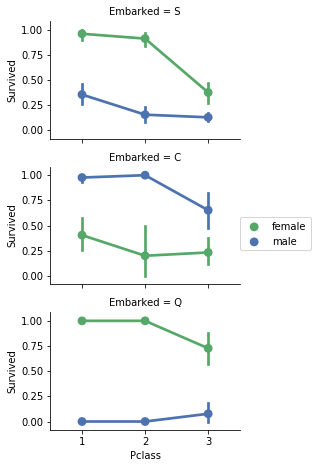

In [13]:
grid=sns.FacetGrid(train_df,row="Embarked",size=2.2,aspect=1.6)
grid.map(sns.pointplot,"Pclass","Survived","Sex",palette="deep")
grid.add_legend()

In embarked "S" and "Q",female has more survival rate.
Exception in Embarked=C where males had higher survival rate. 
This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, 
not necessarily direct correlation between Embarked and Survived.                                                               
Pclass assumption is again coming true,as survival rate is decreasing from pclass 1 to pclass3.                                 
So,I will add "Sex" feature too in modelling and "Embarked" too,but I have to first complete "Embarked" feature.


C:\Users\Lenovo\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


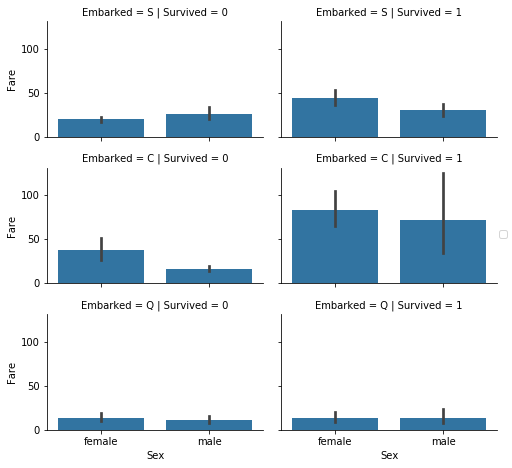

In [14]:
grid=sns.FacetGrid(train_df,row="Embarked",col="Survived",size=2.2,aspect=1.6)
grid.map(sns.barplot,"Sex","Fare")
grid.add_legend()

Higher fare paying passengers had better survival.                                                                                
So,"Fare" is also a crucial feature,I am going to divide that into group as well.

# Data wrangling

As conluded above,I am dropping "Cabin" and "Ticket" feature.

In [15]:
train_df=train_df.drop(["Cabin","Ticket"],axis=1)
test_df=test_df.drop(["Cabin","Ticket"],axis=1)
train_df.shape,test_df.shape

((891, 10), (418, 9))

In [16]:
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 8), (418, 8))

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Converting Categorical feature into numeric

In [18]:
for dataset in combine:
    dataset['Sex']=dataset["Sex"].map({"female":1,"male":0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


Handling missing values of  numerical feature "Age".                                                                             
For that I am using other correlated features,as there was correlation  between "Age" ,"Sex", and "Pclass".                        
Guess Age values using mean values for Age across sets of Pclass and Gender feature combinations. 
So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

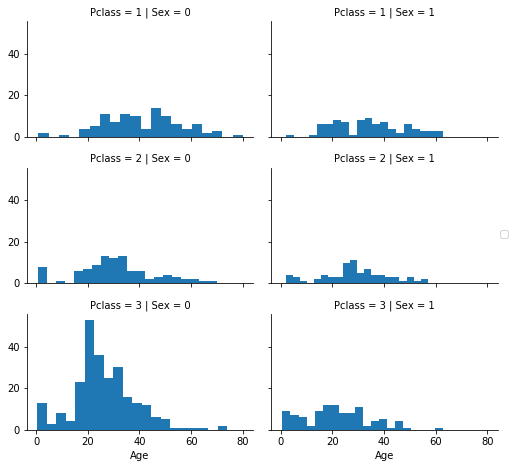

In [19]:
grid=sns.FacetGrid(train_df,col="Sex",row="Pclass",size=2.2,aspect=1.6)
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [20]:
guess_ages = np.zeros((2,3))   #2 for sex,3 for pclass
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [21]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.mean()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S


Let us create Age bands and determine correlations with Survived.

In [22]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


Now,I can remove the AgeBand feature.

In [24]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


CreatIng new feature combining existing features.
I can create a new feature for FamilySize which combines Parch and SibSp.                                                       
This will enable me to drop Parch and SibSp from our datasets.



In [25]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


I am also creating  another feature called IsAlone.

In [26]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Since there isn't significant relationship between FamilySize and Survived.So I am dropping that and instead create new feature 
in form of "IsAlone".

Let me drop Parch, SibSp, and FamilySize features in favor of IsAlone

In [27]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,S,0
1,1,1,1,2,71.2833,C,0
2,1,3,1,1,7.9250,S,1
3,1,1,1,2,53.1000,S,0
4,0,3,0,2,8.0500,S,1


I am  also creating  an artificial feature combining Pclass and Age,which I am naming as "'Age*Class"


In [28]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation.training dataset has two missing values.i WILL simply fill these with the most common occurance.

In [29]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [30]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Converting categorical feature to numeric.                                                      
now I am going to  convert the EmbarkedFill feature by creating a new numeric Port feature.

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,0,3
1,1,1,1,2,71.2833,1,0,2
2,1,3,1,1,7.9250,0,1,3
3,1,1,1,2,53.1000,0,0,2
4,0,3,0,2,8.0500,0,1,6


I can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.                 
Only for test dataset,that too single value.

In [32]:
test_df['Fare'].fillna(test_df['Fare'].dropna().mean(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,6
1,893,3,1,2,7.0000,0,0,6
2,894,2,0,3,9.6875,2,1,6
3,895,3,0,1,8.6625,0,1,3
4,896,3,1,1,12.2875,0,0,3


Similiar to age band,I can create FareBand.

In [33]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Converting the Fare feature to ordinal values based on the FareBand.

In [34]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,0,1,0,0,0,3
1,1,1,1,2,3,1,0,2
2,1,3,1,1,1,0,1,3
3,1,1,1,2,3,0,0,2
4,0,3,0,2,1,0,1,6


# Modelling and Predicting

In [35]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.24

Support Vector Machine

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.6

Linear SVC

In [38]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.24

SGDClassifier

In [39]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


71.27

Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

K nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.73

Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

# Model evaluation

I can now rank our evaluation of all the models to choose the best one for the  problem.
While both Decision Tree and Random Forest score the same,I choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest,acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.75
5,Decision Tree,85.75
1,KNN,83.73
0,Support Vector Machines,82.60
2,Logistic Regression,79.24
4,Linear SVC,79.24


The random forest model confidence score is the highest among models evaluated so far.                     
it is better to use this model's output (Y_pred) for creating our competition submission of results.

# K-Fold Cross Validation

using k=10

In [44]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf,X_train,Y_train,cv=10,scoring="accuracy")
print("scores:",scores)
print("mean:",scores.mean())
print("standard deviation:",scores.std())


scores: [0.73333333 0.81111111 0.73033708 0.83146067 0.85393258 0.83146067
 0.84269663 0.7752809  0.85393258 0.86363636]
mean: 0.8127181931676315
standard deviation: 0.04699352900468515


my model has average accuracy of 81.2% with standard deviation of 4%.

# Feature Importance

In [46]:
importance=pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importance=importance.sort_values("importance",ascending=False).set_index("feature")
importance.head()

,importance
feature,
Sex,0.426
Pclass,0.143
Fare,0.136
Age*Class,0.111
Embarked,0.072


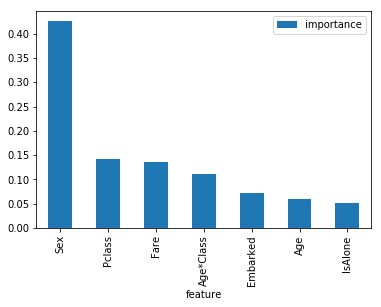

In [48]:
importance.plot.bar()

"Sex" comes out to be the most important feature.

NOTE:
My model did goo,but there is still room of improvement.That can be done by more extensive feature engineering,which i didn't
due to lack of time.Also,I can do hyperparameter tuning too.                                                        
with hope,i can do these in coming days

In [67]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })